Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9008 - loss: 0.3200 - val_accuracy: 0.9865 - val_loss: 0.0454
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0480 - val_accuracy: 0.9883 - val_loss: 0.0404
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9907 - val_loss: 0.0330
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9892 - val_loss: 0.0440
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0175 - val_accuracy: 0.9915 - val_loss: 0.0336
313/313 - 1s - 3ms/step - accuracy: 0.9911 - loss: 0.0278
Test accuracy: 0.991100013256073
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


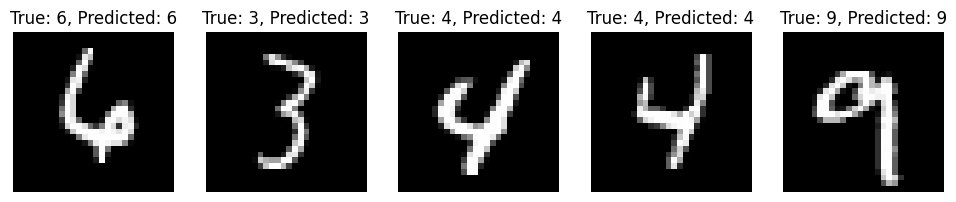

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the image data to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_accuracy)

# Visualize some example predictions
num_examples = 5
random_indices = np.random.choice(test_images.shape[0], num_examples, replace=False)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]

predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 6))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(random_images[i, :, :, 0], cmap='gray')
    plt.title(f"True: {random_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()


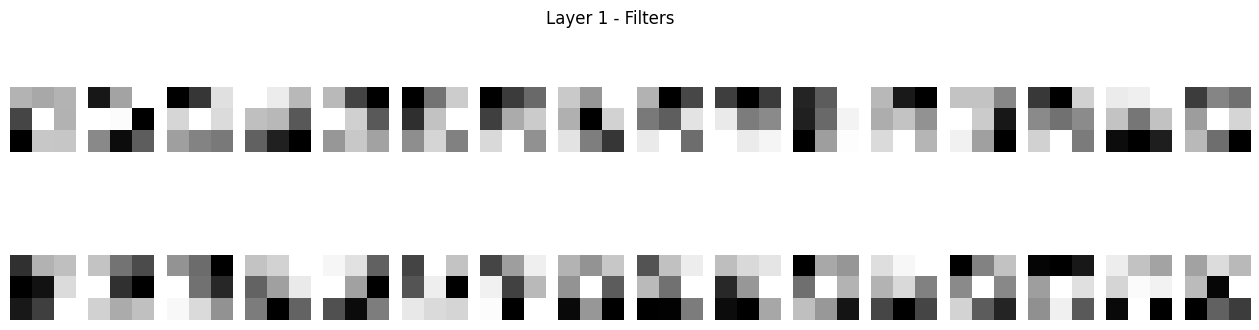

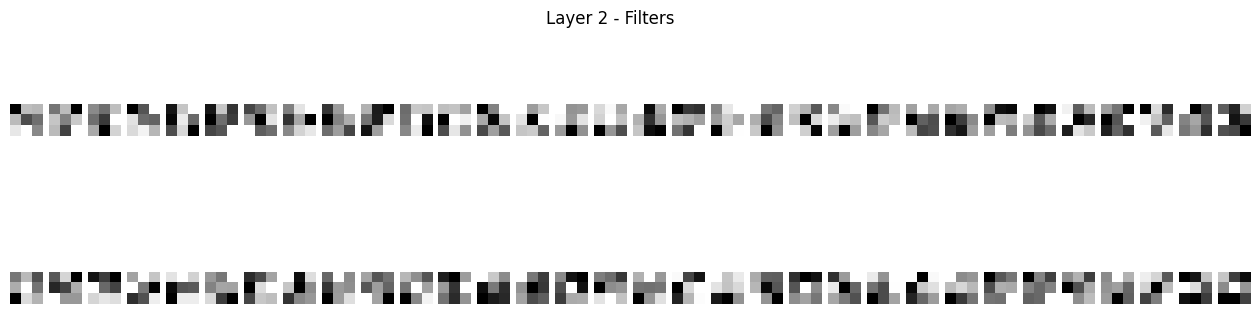

In [ ]:
conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]

for i, layer in enumerate(conv_layers):
    filters = layer.get_weights()[0]
    num_filters = filters.shape[3]
    plt.figure(figsize=(16, 4))
    for j in range(num_filters):
        plt.subplot(2, num_filters // 2, j + 1)
        plt.imshow(filters[:, :, 0, j], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Layer {i + 1} - Filters")
    plt.show()